In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import metrics
import time
def rmse(y, yhat):
    return np.sqrt(metrics.mean_squared_error(y, yhat))

np.set_printoptions(precision=4, threshold=8, edgeitems=4, linewidth=75, suppress=True, nanstr='nan', infstr='inf')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [26]:
k = np.array([1,2,4,6,8])
w = (np.arange(15)+1)*2+1
print(k)
print(w)
record = np.zeros((len(k), len(w)))
print(record)
print(record.shape)
data0 = pd.read_csv('./res/nofilter.csv', index_col=False, header=0)
data0 = data0.values
print(data0)
for i in range(len(k)):
    for j in range(len(w)):
        if k[i]<w[j]:
            data = pd.read_csv('./res/SG_'+str(w[j])+'_'+str(k[i])+'.csv', index_col=False, header=0)
            data = data.values
            record[i,j]=rmse(data0[:,0],data[:,1])
        else:
            record[i,j] = np.NAN
print(record)

[1 2 4 6 8]
[ 3  5  7  9 ... 25 27 29 31]
[[0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]]
(5, 15)
[[   0.       19.8681]
 [   0.       17.0655]
 [   0.        7.3602]
 [   0.       10.7167]
 ...
 [1173.0558 3322.2715]
 [1788.2848 1766.1401]
 [2418.3825 2657.5808]
 [2779.1841 1913.7952]]
[[112.4434 166.1199 208.4289 236.2718 ... 342.358  350.8337 359.1402
  367.708 ]
 [281.2545 115.5201 153.4964 170.9908 ... 266.4742 273.9076 282.2611
  285.2493]
 [     nan 277.0595 123.4619 138.1661 ... 229.173  233.5577 240.261
  246.5814]
 [     nan      nan 279.5393 133.0546 ... 198.9271 205.713  210.7419
  217.4578]
 [     nan      nan      nan 276.5408 ... 184.2946 186.4906 193.2038
  198.0152]]


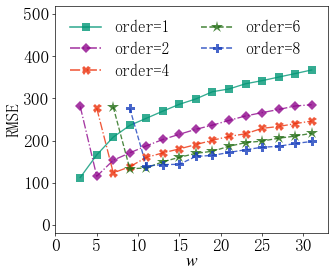

In [28]:
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
config = {
            "font.family": 'serif',
            "font.size": 21,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
rcParams.update(config)
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=60)
# 绘图
# 自变量
x = (np.arange(15)+1)*2+1
# y = record[2]
colors = ['#009675ca', '#8e058bca', '#ec2d07ca', '#1d6a0fca', '#173ebcca']
markers = ['s', 'D', 'X', '*', 'P']
msize = [8.5, 7.8, 10.8, 15, 10.8]
plt.plot(x, record[0,:], label=r'order=1', linewidth=1.6, linestyle='-', color=colors[0], marker=markers[0], markersize = msize[0], markerfacecolor=colors[0], markeredgecolor='#FD4040', markeredgewidth=0)
plt.plot(x, record[1,:], label=r'order=2', linewidth=1.6, linestyle='-.', color=colors[1], marker=markers[1], markersize = msize[1], markerfacecolor=colors[1], markeredgecolor='#249166', markeredgewidth=0)
plt.plot(x, record[2,:], label=r'order=4', linewidth=1.6, linestyle='-.', color=colors[2], marker=markers[2], markersize = msize[2], markerfacecolor=colors[2], markeredgecolor='#FD4040', markeredgewidth=0)
plt.plot(x, record[3,:], label=r'order=6', linewidth=1.6, linestyle='--', color=colors[3], marker=markers[3], markersize = msize[3], markerfacecolor=colors[3], markeredgecolor='#FD4040', markeredgewidth=0)
plt.plot(x, record[4,:], label=r'order=8', linewidth=1.6, linestyle='--', color=colors[4], marker=markers[4], markersize = msize[4], markerfacecolor=colors[4], markeredgecolor='#FD4040', markeredgewidth=0)

# 设置坐标系
plt.xlim(0, 33)
plt.ylim(-20, 520)
# 坐标轴名
ax1.set_xlabel(r'$w$', labelpad=1)#, fontsize=10
ax1.set_ylabel('RMSE', labelpad=4)
#设置主刻度标签的位置
ax1.xaxis.set_major_locator(plt.MultipleLocator(5)) #将轴主刻度标签设置为 的倍数
# ax1.yaxis.set_major_locator(plt.MultipleLocator(.2))

legend = plt.legend(loc='upper left',frameon=False, ncol=2,fancybox=False,
                    facecolor='white', fontsize=19)#loc='upper left', ,edgecolor='black', fontsize=7, bbox_to_anchor=(.6, 1)
# set the linewidth of each legend object
for legobj in legend.legendHandles:
	legobj.set_linewidth(1.9)

plt.tight_layout()
plt.savefig('./output/predict_rmse_w_k_plot2.jpg', dpi=600)
# plt.savefig('./output/'+time.strftime('%Y_%m_%d_%H_%M_%S', time.localtime())+'.tiff', dpi=300)
plt.show()
plt.close(fig)